In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
dataset.shape

(266, 104)

In [14]:
df = dataset.drop(["Lat", "Long"], axis=1,inplace=True)

In [15]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [38]:
corona_datase_aggregated = dataset.groupby("Country/Region").sum()

In [46]:
corona_datase_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [47]:
corona_datase_aggregated.shape

(187, 101)

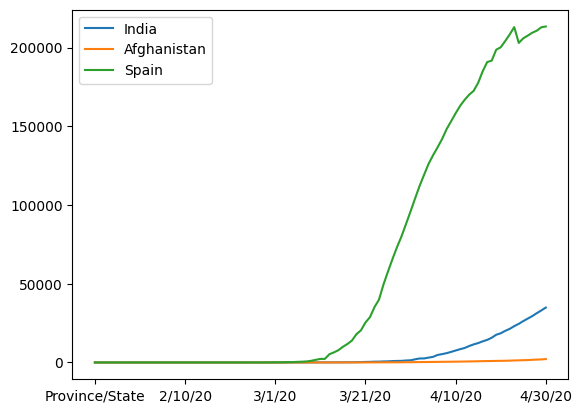

In [52]:
corona_datase_aggregated.loc["India"].plot()
corona_datase_aggregated.loc["Afghanistan"].plot()
corona_datase_aggregated.loc["Spain"].plot()
plt.legend()

<Axes: >

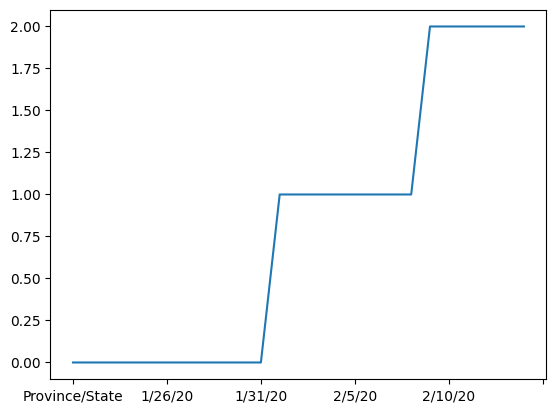

In [57]:
corona_datase_aggregated.loc["Spain"][:25].plot()

<Axes: >

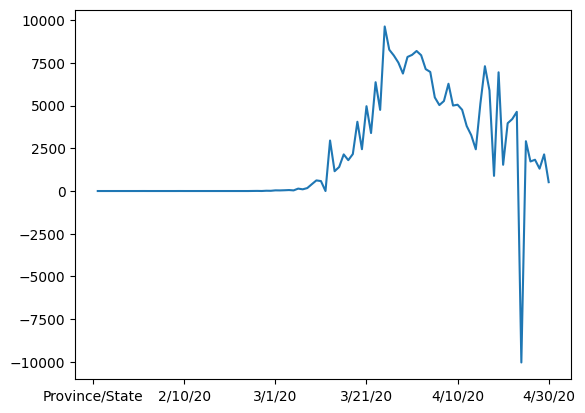

In [60]:
corona_datase_aggregated.loc["Spain"].diff().plot()

In [61]:
corona_datase_aggregated.loc["Spain"].diff().max()

np.int64(9630)

In [63]:
corona_datase_aggregated.loc["India"].diff().max()

np.int64(1893)

In [66]:
corona_datase_aggregated.loc["Afghanistan"].diff().max()

np.int64(232)

In [ ]:
countries = list(corona_datase_aggregated.index)
max_infection_rates = []

for c in countries:
    data = corona_datase_aggregated.loc[c]

    if isinstance(data, pd.DataFrame):
        data = data.select_dtypes(include='number').sum()

    else:
        data = pd.to_numeric(data, errors='coerce')

    max_infection_rates.append(data.diff().max())

In [73]:
corona_datase_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


In [78]:
corona_data = pd.DataFrame({
    "country": countries,
    "max_infection_rate": max_infection_rates
})


In [79]:
corona_data

,country,max_infection_rate
0,Afghanistan,232.0
1,Albania,34.0
2,Algeria,199.0
3,Andorra,43.0
4,Angola,5.0
...,...,...
182,West Bank and Gaza,66.0
183,Western Sahara,4.0
184,Yemen,5.0
185,Zambia,9.0


In [104]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [105]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [106]:
happiness_report.columns = happiness_report.columns.str.strip().str.lower()

useless_columns = ["overall rank", "score", "generosity", "perceptions of corruption"]
happiness_report.drop(useless_columns, axis=1, inplace=True)

In [107]:
happiness_report.head()

,country or region,gdp per capita,social support,healthy life expectancy,freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [108]:
happiness_report.set_index("country or region", inplace=True)
happiness_report.head()

,gdp per capita,social support,healthy life expectancy,freedom to make life choices
country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [109]:
corona_data.shape

(187, 1)

In [110]:
happiness_report.shape

(156, 4)

In [113]:
data = corona_data.join(happiness_report, how="inner")
data

,max_infection_rate,gdp per capita,social support,healthy life expectancy,freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [114]:
data.corr()

,max_infection_rate,gdp per capita,social support,healthy life expectancy,freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
gdp per capita,0.250118,1.000000,0.759468,0.863062,0.394603
social support,0.191958,0.759468,1.000000,0.765286,0.456246
healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<Axes: xlabel='gdp per capita', ylabel='max_infection_rate'>

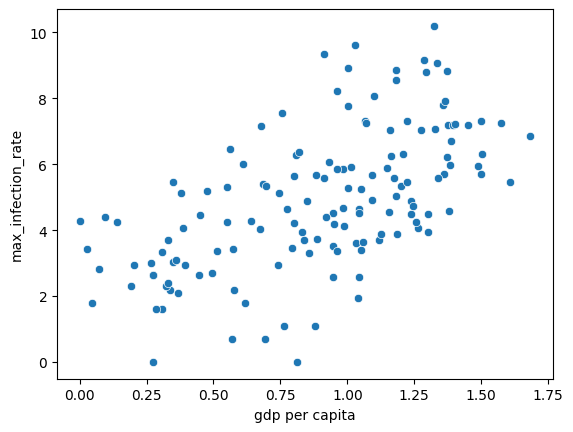

In [121]:
x = data["gdp per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='gdp per capita', ylabel='max_infection_rate'>

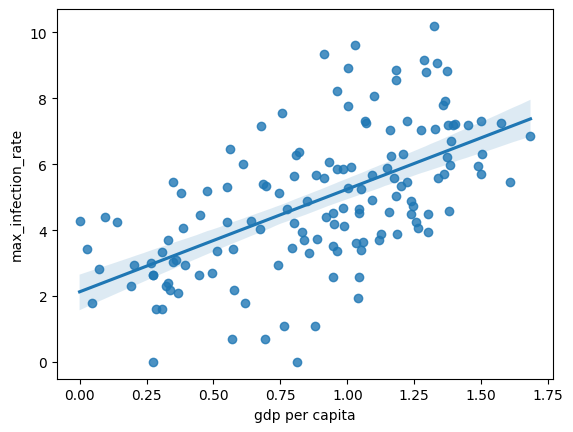

In [124]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='social support', ylabel='max_infection_rate'>

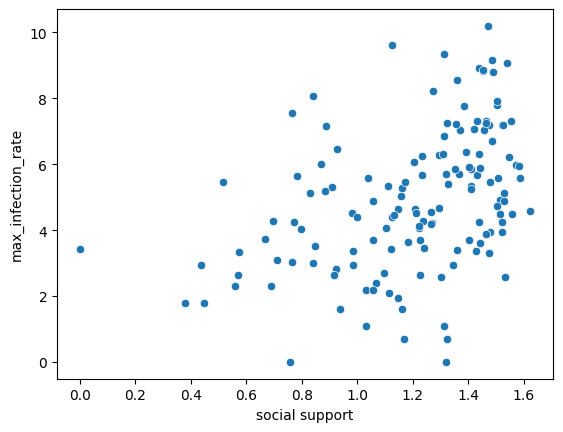

In [125]:
x = data["social support"]
y = data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='social support', ylabel='max_infection_rate'>

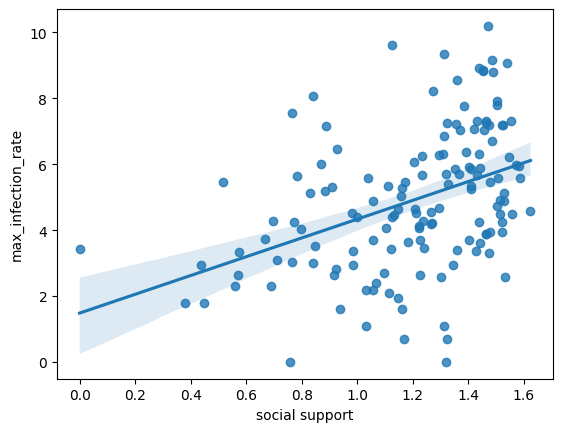

In [126]:
sns.regplot(x=x,y=(np.log(y)))

<Axes: xlabel='healthy life expectancy', ylabel='max_infection_rate'>

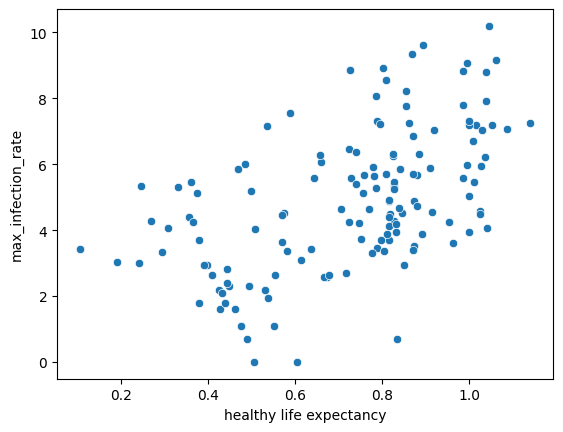

In [130]:
x = data["healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='healthy life expectancy', ylabel='max_infection_rate'>

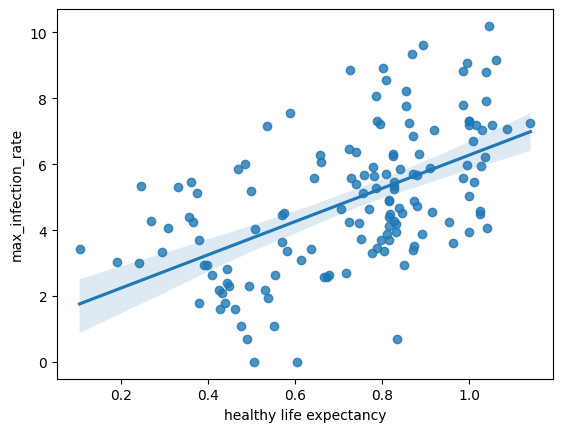

In [132]:
sns.regplot(x=x,y=(np.log(y)))